This notebook is adapted from UW [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)

# Introduction to Altair

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python. Altair offers a powerful and concise visualization grammar for quickly building a wide range of statistical graphics.

By *declarative*, we mean that you can provide a high-level specification of *what* you want the visualization to include, in terms of *data*, *graphical marks*, and *encoding channels*, rather than having to specify *how* to implement the visualization in terms of for-loops, low-level drawing commands, *etc*. The key idea is that you declare links between data fields and visual encoding channels, such as the x-axis, y-axis, color, *etc*. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar.

## Imports

To start, we must import the necessary libraries: Pandas for data frames and Altair for visualization.

In [2]:
#uncomment and run only for the first time
#pip install altair vega notebook vega_datasets

In [1]:
import pandas as pd
import altair as alt
#uncomment one of the following
#if you have an old version of Altair
# alt.renderers.enable('notebook')
#if you have a recent version of Altair
# alt.renderers.enable('default')

RendererRegistry.enable('notebook')

### Weather Data

Statistical visualization in Altair begins with ["tidy"](http://vita.had.co.nz/papers/tidy-data.html) data frames. Here, we'll start by creating a simple data frame (`df`) containing the average precipitation (`precip`) for a given `city` and `month` :

In [2]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


## The Chart Object

The fundamental object in Altair is the `Chart`, which takes a data frame as a single argument:

In [3]:
chart = alt.Chart(df)

In [5]:
#chart

So far, we have defined the `Chart` object and passed it the simple data frame we generated above. We have not yet told the chart to *do* anything with the data.

## Marks and Encodings

With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of graphical *mark* (geometric shape) we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods.

For example, we can show the data as a point using `Chart.mark_point()`:

In [9]:
ch2 = chart.mark_rect()
ch2

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various *encoding channels*, or *channels* for short, to fields in the dataset. For example, we could *encode* the field `city` of the data using the `y` channel, which represents the y-axis position of the points. To specify this, use the `encode` method:


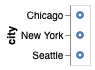

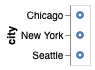

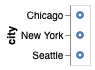

In [14]:
alt.Chart(df).mark_point().encode(
  y='city',
)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, *etc.*) to fields in the dataset, accessed by field name. For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the *nominal* type, indicating unordered, categorical values.

Though we've now separated the data by one attribute, we still have multiple points overlapping within each category. Let's further separate these by adding an `x` encoding channel, mapped to the `'precip'` field:

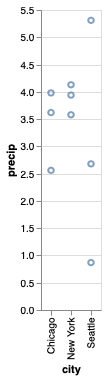

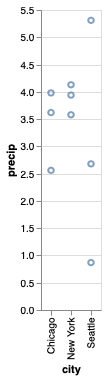

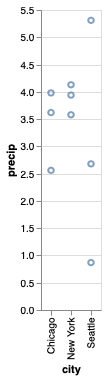

In [19]:
alt.Chart(df).mark_point().encode(
    x='city',
    y='precip'
)

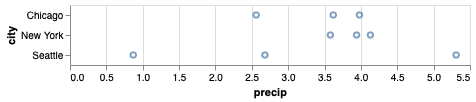

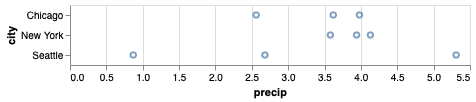

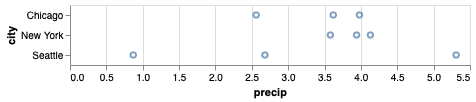

In [16]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city')
)

## Data Transformation: Aggregation

To allow for more flexibility in how data are visualized, Altair has a built-in syntax for *aggregation* of data. For example, we can compute the average of all values by specifying an aggregation function along with the field name:

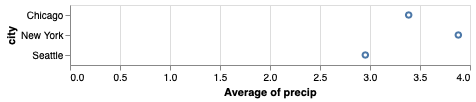

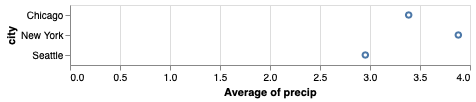

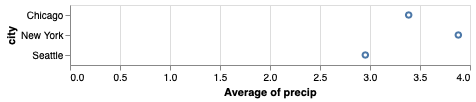

In [21]:
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

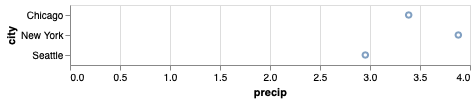

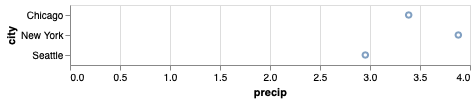

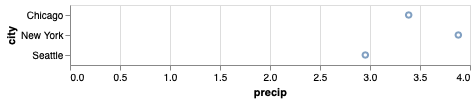

In [28]:
df2=df.groupby('city').mean().reset_index()
alt.Chart(df2).mark_point().encode(
    x='precip',
    y='city'
)

Now within each x-axis category, we see a single point reflecting the *average* of the values within that category.

_Does Seattle really have the lowest average precipitation of these cities? (It does!) Still, how might this plot mislead? Which months are included? What counts as precipitation?_

Altair supports a variety of aggregation functions, including `count`, `min` (minimum), `max` (maximum), `average`, `median`, and `stdev` (standard deviation). In a later notebook, we will take a tour of data transformations, including aggregation, sorting, filtering, and creation of new derived fields using calculation formulas.

## Changing the Mark Type

Let's say we want to represent our aggregated values using rectangular bars rather than circular points. We can do this by replacing `Chart.mark_point` with `Chart.mark_bar`:

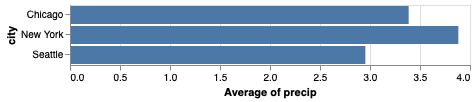

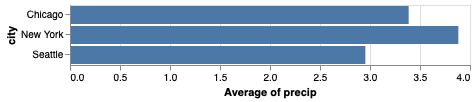

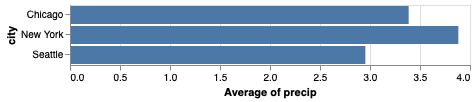

In [31]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

Because the nominal field `a` is mapped to the `y`-axis, the result is a horizontal bar chart. To get a vertical bar chart, we can simply swap the `x` and `y` keywords:

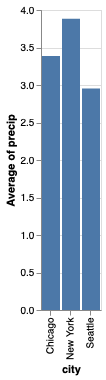

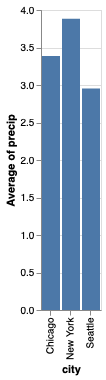

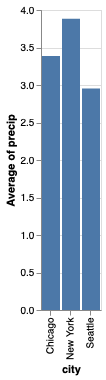

In [32]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

# Combining charts


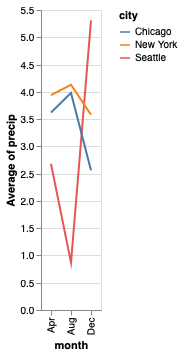

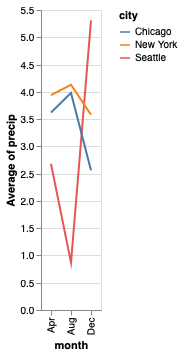

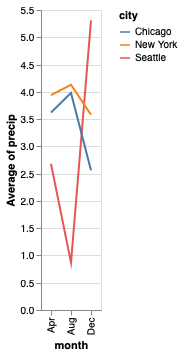

In [34]:
chart1 = alt.Chart(df).mark_line().encode(
    x='month',
    y='average(precip)',
    color='city'
)
chart1

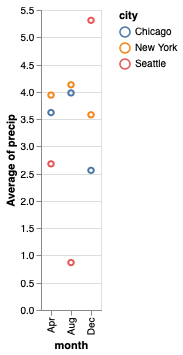

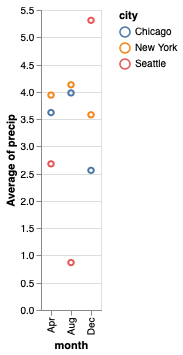

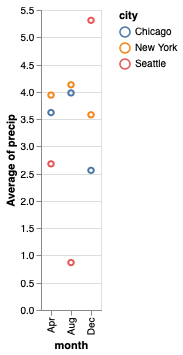

In [35]:
chart2 = alt.Chart(df).mark_point().encode(
    x='month',
    y='average(precip)',
    color='city'
)
chart2

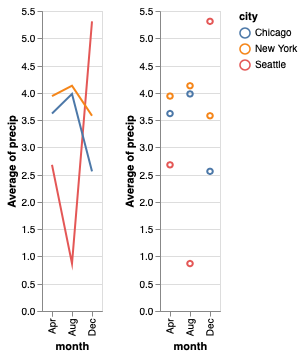

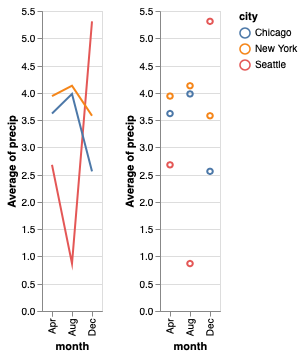

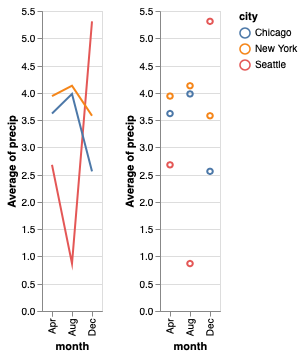

In [36]:
chart3 = chart1 | chart2
chart3

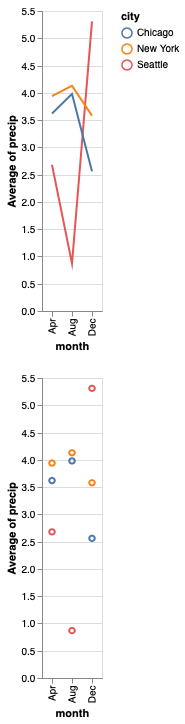

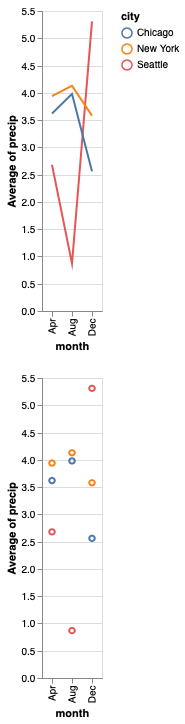

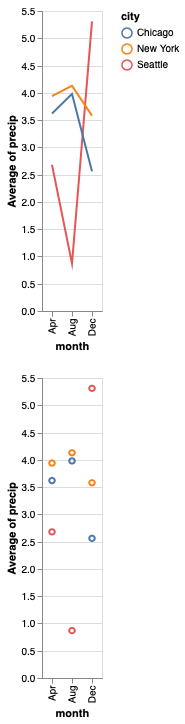

In [37]:
chart4 = chart1 & chart2
chart4

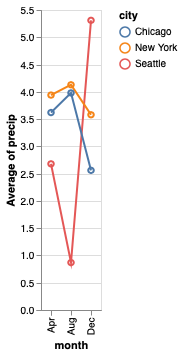

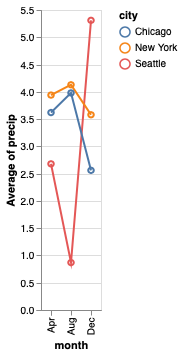

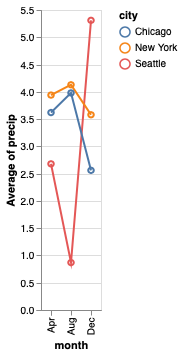

In [38]:
chart5 = chart1 + chart2
chart5

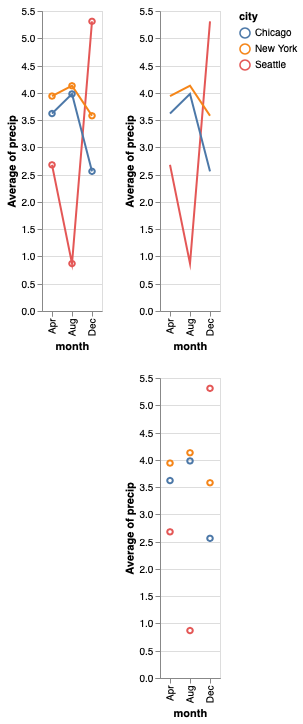

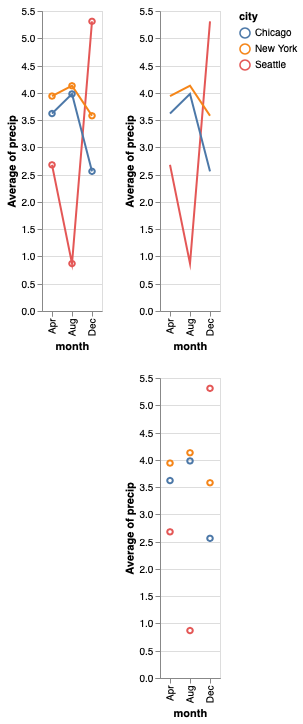

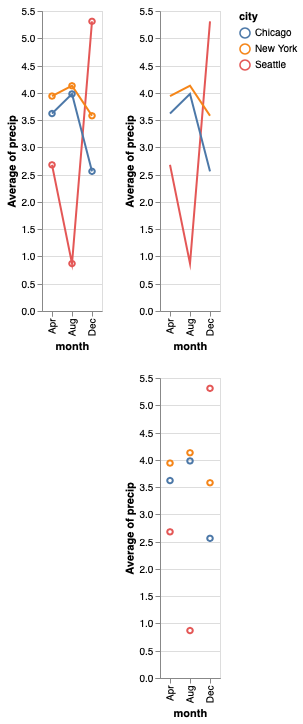

In [40]:
chart5 | chart4

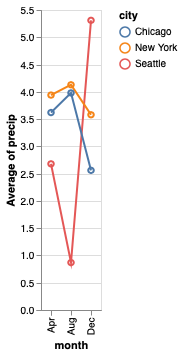

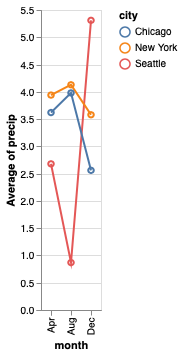

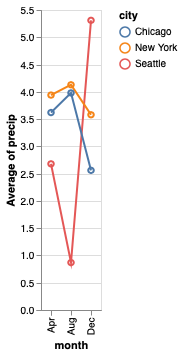

In [41]:
chart5.interactive()

In [42]:
chart5.save('chart.html')